In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk

In [30]:
df = pd.read_csv('Reviews.csv')
df.columns = df.columns.str.lower()
df.shape

(568454, 10)

In [31]:
df.head()

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [34]:
df = df.sample(n=1000, random_state=5).reset_index()
df.head()

,index,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,449283,449284,B000R9Q40E,A1RQBPH48JUIS9,Kathi,0,0,5,1347753600,Highly recommended if you can handle the quantity,I learned how great this stuff was a couple of...
1,548406,548407,B007P6HV5Y,A29P51TN9KKMU9,Azzrian,0,0,5,1348617600,Oh La La!,Wooo hoooo my third matcha today. Its been a l...
2,37438,37439,B000FBO9LK,A2OWR2PL3DLWS4,Love to Cook,0,0,5,1264032000,YUM- like a perfect Rice Crispy,If Rice Crispy bars were made with good chocol...
3,95984,95985,B006ACQYXY,AY6QZ7AY3AK8Z,"Ashwani Batra ""Ashwani""",17,24,1,1334188800,Fluoridated salt,I thought this salt was fluoride free unfortun...
4,375003,375004,B001CAT1ZM,A19LOYSSYGHLX6,salgoud42,1,1,5,1333929600,Kitchen Necessity,We buy this by the case. All of children use ...


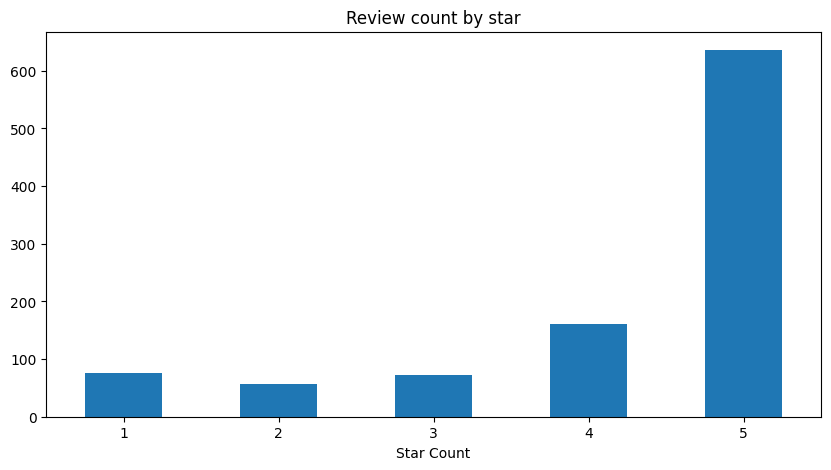

In [35]:
ax = df['score'].value_counts().sort_index().plot(kind='bar', title='Review count by star', figsize=(10,5))
ax.set_xlabel("Star Count")
plt.xticks(rotation='horizontal')
plt.show()

In [36]:
tokens = nltk.word_tokenize(df['text'][53])
tokens[:10]

['My', 'wife', 'and', 'I', 'were', 'very', 'surprised', '.', 'The', 'eggs']

In [37]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('My', 'PRP$'),
 ('wife', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('were', 'VBD'),
 ('very', 'RB'),
 ('surprised', 'JJ'),
 ('.', '.'),
 ('The', 'DT'),
 ('eggs', 'NNS')]

In [38]:
nltk.chunk.ne_chunk(tagged).pprint()

(S
  My/PRP$
  wife/NN
  and/CC
  I/PRP
  were/VBD
  very/RB
  surprised/JJ
  ./.
  The/DT
  eggs/NNS
  ,/,
  in/IN
  water/NN
  ,/,
  look/VB
  just/RB
  like/IN
  real/JJ
  fresh/JJ
  eggs/NNS
  ./.
  They/PRP
  cooked/VBD
  just/RB
  like/IN
  real/JJ
  eggs/NNS
  and/CC
  tasted/VBD
  then/RB
  real/JJ
  eggs/NNS
  ./.
  We/PRP
  love/VBP
  these/DT
  and/CC
  will/MD
  be/VB
  getting/VBG
  more/JJR
  for/IN
  long/JJ
  term/NN
  storage/NN
  ./.)


In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
analyzer = SentimentIntensityAnalyzer() 

In [41]:
analyzer.polarity_scores('I like the bad taste of it')

{'neg': 0.35, 'neu': 0.4, 'pos': 0.25, 'compound': -0.25}

In [42]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    id = row['id']
    res[id] = analyzer.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [43]:
vaders = pd.DataFrame(res).T.reset_index().rename(columns={'index':'id'})
vaders.head()

,id,neg,neu,pos,compound
0,449284,0.069,0.649,0.282,0.9527
1,548407,0.005,0.879,0.116,0.9875
2,37439,0.066,0.700,0.234,0.9810
3,95985,0.099,0.831,0.071,-0.5267
4,375004,0.000,0.946,0.054,0.2500


In [44]:
vaders = vaders.merge(df, how='left')
vaders

,id,neg,neu,pos,compound,index,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,449284,0.069,0.649,0.282,0.9527,449283,B000R9Q40E,A1RQBPH48JUIS9,Kathi,0,0,5,1347753600,Highly recommended if you can handle the quantity,I learned how great this stuff was a couple of...
1,548407,0.005,0.879,0.116,0.9875,548406,B007P6HV5Y,A29P51TN9KKMU9,Azzrian,0,0,5,1348617600,Oh La La!,Wooo hoooo my third matcha today. Its been a l...
2,37439,0.066,0.700,0.234,0.9810,37438,B000FBO9LK,A2OWR2PL3DLWS4,Love to Cook,0,0,5,1264032000,YUM- like a perfect Rice Crispy,If Rice Crispy bars were made with good chocol...
3,95985,0.099,0.831,0.071,-0.5267,95984,B006ACQYXY,AY6QZ7AY3AK8Z,"Ashwani Batra ""Ashwani""",17,24,1,1334188800,Fluoridated salt,I thought this salt was fluoride free unfortun...
4,375004,0.000,0.946,0.054,0.2500,375003,B001CAT1ZM,A19LOYSSYGHLX6,salgoud42,1,1,5,1333929600,Kitchen Necessity,We buy this by the case. All of children use ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50123,0.000,0.783,0.217,0.8698,50122,B001E6PKOA,A4FL32BUR1TMO,"D. C. ""Truth in Sight""",0,0,5,1328486400,Dog loves IT,My dog has a very sensitive stomach and this p...
996,35533,0.000,0.661,0.339,0.9370,35532,B000QZOYG0,A2B8I8BHYNO5E3,Stacey Phok,0,0,5,1345248000,Delicious,I bought these chocolate baseballs to add to f...
997,39126,0.030,0.708,0.262,0.9466,39125,B0008DIF6A,A1MU8KNKXES790,Val,0,0,5,1338768000,Perfect!,"I used these for making the ""ladybug cake bits..."
998,414120,0.000,0.685,0.315,0.8645,414119,B005IDW20A,A1FF5NFZIK2SLG,Kelly,0,0,5,1341964800,Freezy Pups,Dogs love them! They are sticky when handling ...


<Axes: xlabel='score', ylabel='compound'>

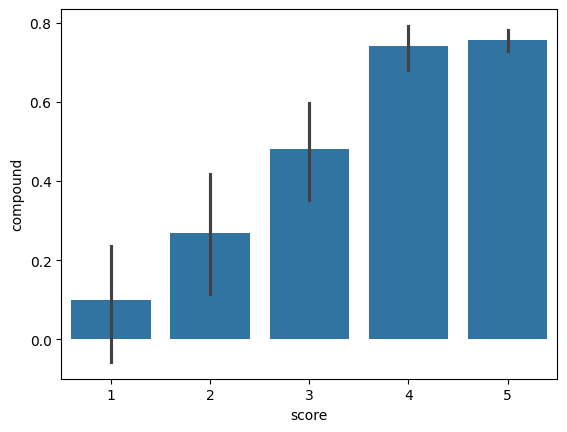

In [45]:
sns.barplot(data=vaders, x='score', y='compound')

trying hugging face model

In [47]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [48]:
model_name = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [83]:
test = df['text'][13]
print(test)
print(analyzer.polarity_scores(test))

Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
{'neg': 0.047, 'neu': 0.896, 'pos': 0.057, 'compound': 0.09}


In [85]:
encoded = tokenizer(test, return_tensors='pt')
output = model(**encoded)
softmax(output[0][0].detach().numpy())

array([0.8448366 , 0.13822384, 0.0169395 ], dtype=float32)